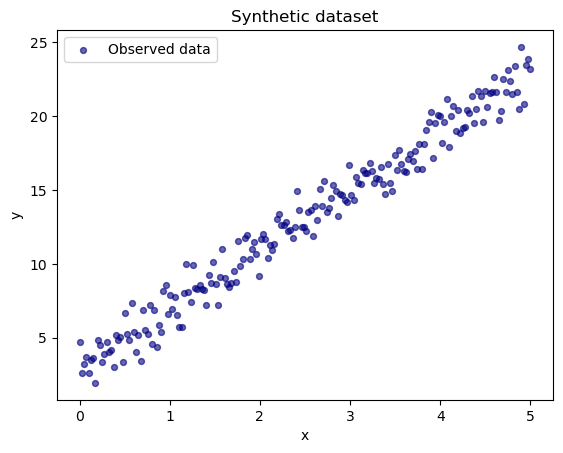

=== Normal Equation Solution ===
Intercept: 2.986
Slope:     3.995


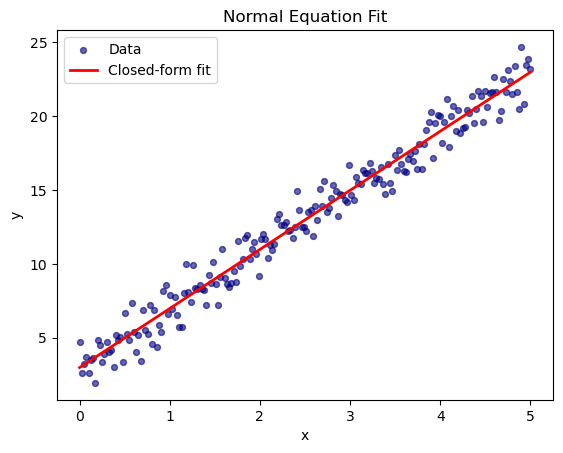


=== Gradient Descent Solution ===
Intercept: 2.986
Slope:     3.995


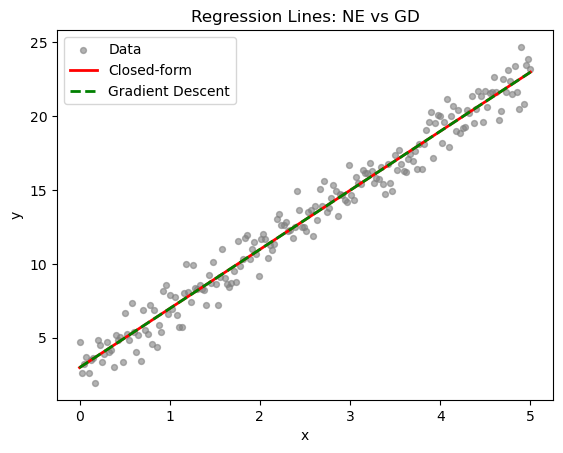

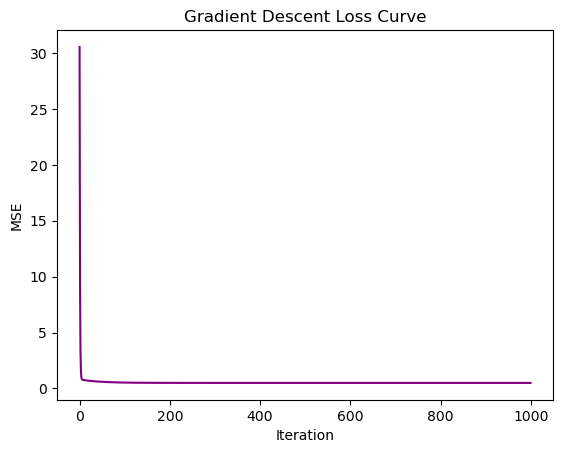


=== Final Comparison ===
Closed-form -> Intercept: 2.986, Slope: 3.995
GD solution -> Intercept: 2.986, Slope: 3.995
Observation: Both methods converged to nearly identical values!


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Generate dataset
# -------------------------------
np.random.seed(7)   # for reproducibility
n = 200
X = np.linspace(0, 5, n).reshape(-1, 1)         # 200 samples
noise = np.random.normal(0, 1, (n, 1))          # Gaussian noise
y = 3 + 4 * X + noise                           # true model: y = 3 + 4x + ε

# visualize raw data
plt.scatter(X, y, s=18, alpha=0.6, c="navy", label="Observed data")
plt.title("Synthetic dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Add bias term (intercept column)
X_aug = np.hstack([np.ones((n, 1)), X])

# -------------------------------
# 2. Normal Equation
# -------------------------------
theta_ne = np.linalg.inv(X_aug.T @ X_aug) @ (X_aug.T @ y)

print("=== Normal Equation Solution ===")
print(f"Intercept: {theta_ne[0,0]:.3f}")
print(f"Slope:     {theta_ne[1,0]:.3f}")

y_hat_ne = X_aug @ theta_ne

# plot line
plt.scatter(X, y, s=18, alpha=0.6, c="navy", label="Data")
plt.plot(X, y_hat_ne, color="red", linewidth=2, label="Closed-form fit")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Normal Equation Fit")
plt.legend()
plt.show()

# -------------------------------
# 3. Gradient Descent
# -------------------------------
def mse(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X @ theta - y) ** 2)

def run_gradient_descent(X, y, lr=0.05, n_iter=1000):
    m, n_features = X.shape
    theta = np.zeros((n_features, 1))   # init [0,0]
    cost_history = []

    for _ in range(n_iter):
        gradient = (1/m) * X.T @ (X @ theta - y)
        theta -= lr * gradient
        cost_history.append(mse(X, y, theta))
    
    return theta, cost_history

theta_gd, loss_vals = run_gradient_descent(X_aug, y, lr=0.05, n_iter=1000)

print("\n=== Gradient Descent Solution ===")
print(f"Intercept: {theta_gd[0,0]:.3f}")
print(f"Slope:     {theta_gd[1,0]:.3f}")

y_hat_gd = X_aug @ theta_gd

# compare both fits
plt.scatter(X, y, s=18, alpha=0.6, c="gray", label="Data")
plt.plot(X, y_hat_ne, "r-", linewidth=2, label="Closed-form")
plt.plot(X, y_hat_gd, "g--", linewidth=2, label="Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regression Lines: NE vs GD")
plt.legend()
plt.show()

# plot loss curve
plt.plot(loss_vals, color="purple")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Loss Curve")
plt.show()

# -------------------------------
# 4. Comparison
# -------------------------------
print("\n=== Final Comparison ===")
print(f"Closed-form -> Intercept: {theta_ne[0,0]:.3f}, Slope: {theta_ne[1,0]:.3f}")
print(f"GD solution -> Intercept: {theta_gd[0,0]:.3f}, Slope: {theta_gd[1,0]:.3f}")
print("Observation: Both methods converged to nearly identical values!")
